# Assignment_17_Naive_Bayes

1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [242]:
import pandas as pd
import numpy as np

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [244]:
train = pd.read_csv("D:\Data Science\Assignments\SalaryData_Train.csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [245]:
train.shape  # Rows and columns

(30161, 14)

In [246]:
train.columns  # columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [247]:
# Rename columns
train.columns = ['Age', 'WC', 'ED', 'EN', 'MS','OC', 'RL', 'RC', 'Sex', 'CG','CL', 'HW', 'Nat', 'Sal']

In [248]:
train.columns  # Check column names

Index(['Age', 'WC', 'ED', 'EN', 'MS', 'OC', 'RL', 'RC', 'Sex', 'CG', 'CL',
       'HW', 'Nat', 'Sal'],
      dtype='object')

In [249]:
train.index  # Rows

RangeIndex(start=0, stop=30161, step=1)

In [250]:
train.info()  # Data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     30161 non-null  int64 
 1   WC      30161 non-null  object
 2   ED      30161 non-null  object
 3   EN      30161 non-null  int64 
 4   MS      30161 non-null  object
 5   OC      30161 non-null  object
 6   RL      30161 non-null  object
 7   RC      30161 non-null  object
 8   Sex     30161 non-null  object
 9   CG      30161 non-null  int64 
 10  CL      30161 non-null  int64 
 11  HW      30161 non-null  int64 
 12  Nat     30161 non-null  object
 13  Sal     30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [251]:
train.describe().T   # Discripttive statistics  # Here T is for Transformation

,count,mean,std,min,25%,50%,75%,max
Age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
EN,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
CG,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
CL,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
HW,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [252]:
train.isna().sum()  # Checking null values, there is no null values present in given dataset

Age    0
WC     0
ED     0
EN     0
MS     0
OC     0
RL     0
RC     0
Sex    0
CG     0
CL     0
HW     0
Nat    0
Sal    0
dtype: int64

In [253]:
train['Sal'].unique()   

array([' <=50K', ' >50K'], dtype=object)

In [254]:
train['Sal'].value_counts()

 <=50K    22653
 >50K      7508
Name: Sal, dtype: int64

In [255]:
train[train.duplicated()]   # Checking duplicate values

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [256]:
# Checking Correlation between numerical function
train.corr()

,Age,EN,CG,CL,HW
Age,1.000000,0.043525,0.080152,0.060278,0.101598
EN,0.043525,1.000000,0.124416,0.079691,0.152522
CG,0.080152,0.124416,1.000000,-0.032218,0.080431
CL,0.060278,0.079691,-0.032218,1.000000,0.052454
HW,0.101598,0.152522,0.080431,0.052454,1.000000


In [257]:
df = train.drop_duplicates()   # correlation without droping duplicated raws
df.head()

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [258]:
corr= df.corr()   # correlation with droping duplicated raws

# Visualization

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

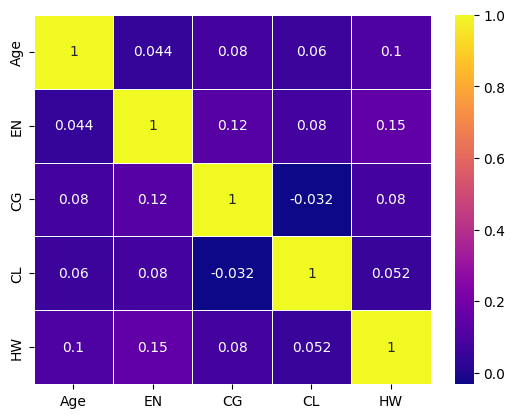

In [260]:
sns.heatmap(train.corr(), annot = True, linewidths = 0.5, cmap = 'plasma')

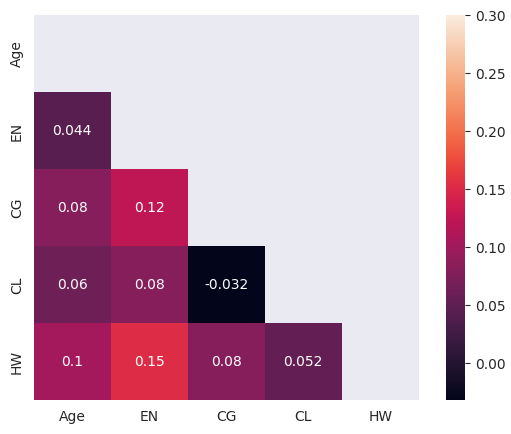

In [261]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):  # Style must be: white, whitegrid, dark, darkgrid.
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr,mask=mask, vmax=.3, square=True, annot = True)

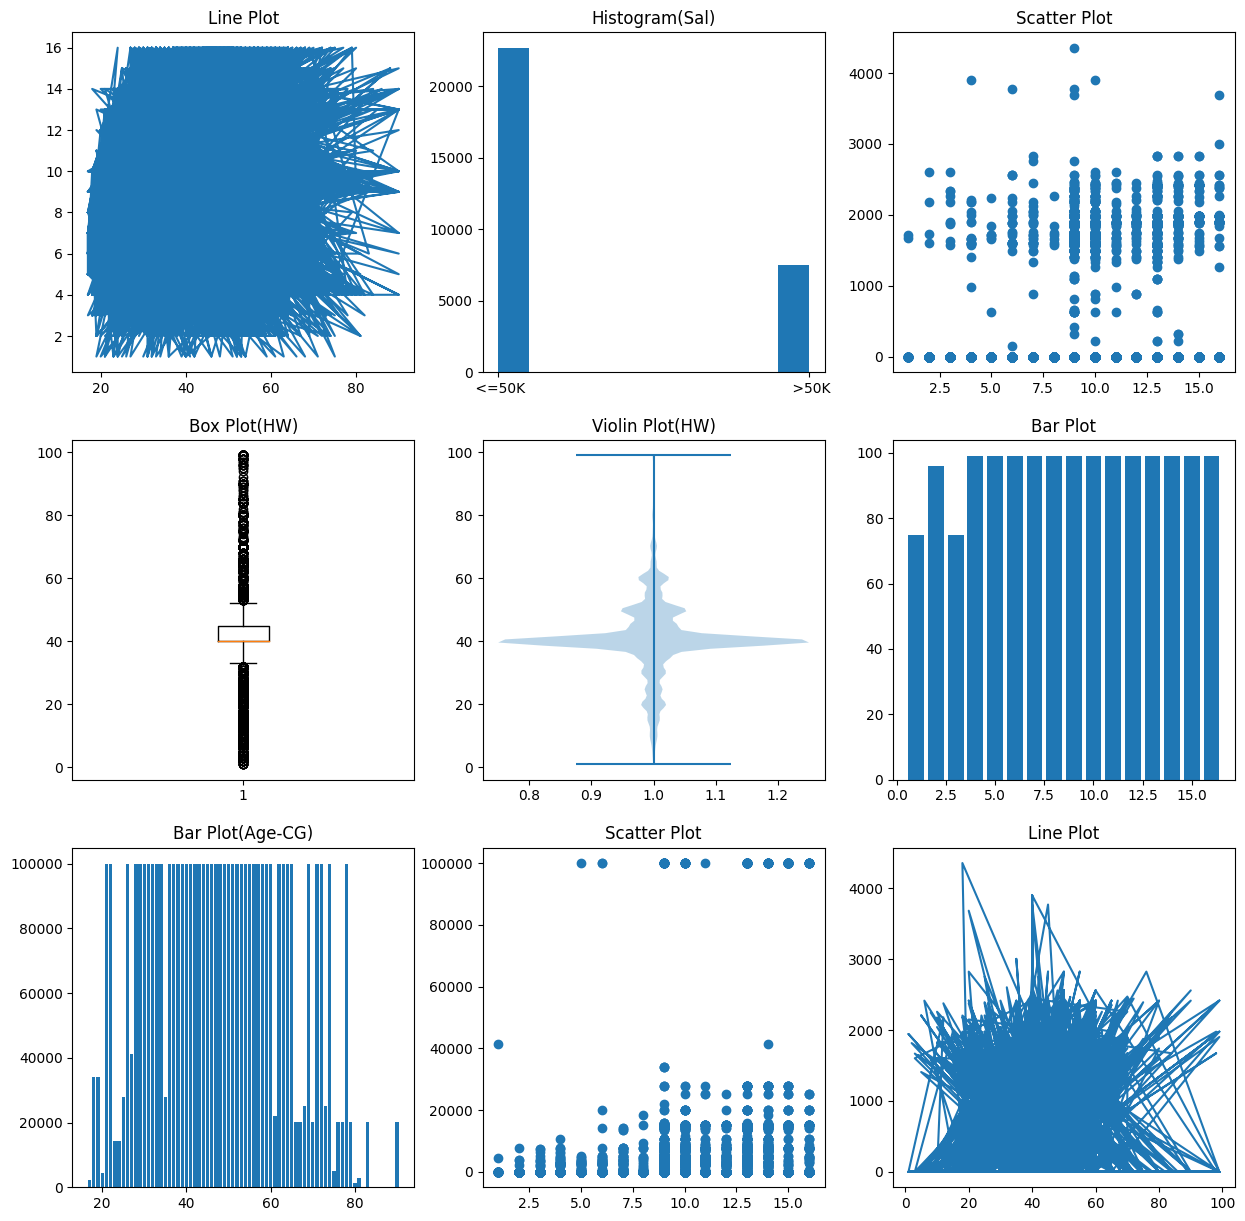

In [262]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('Age','EN', data = train);ax[0,0].set_title("Line Plot")
ax[0,1].hist('Sal', data = train);ax[0,1].set_title("Histogram(Sal)")
ax[0,2].scatter('EN', 'CL', data = train);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('HW', data = train);ax[1,0].set_title("Box Plot(HW)")
ax[1,1].violinplot('HW', data = train);ax[1,1].set_title("Violin Plot(HW)")
ax[1,2].bar('EN','HW', data = train);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(train['Age'], train["CG"]);ax[2,0].set_title("Bar Plot(Age-CG)")
ax[2,1].scatter('EN','CG', data = train);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('HW','CL', data = train);ax[2,2].set_title("Line Plot")
plt.show()

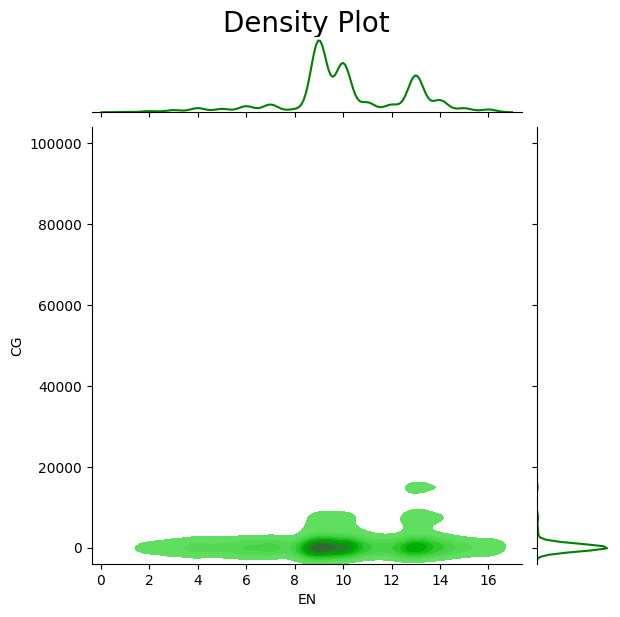

In [264]:
sns.jointplot(x = 'EN', y='CG', data = train, kind= 'kde', shade = True, color = 'green')  # shade = True: filed with color shape
plt.title("Density Plot", size = 20, y= 1.2)
plt.show()

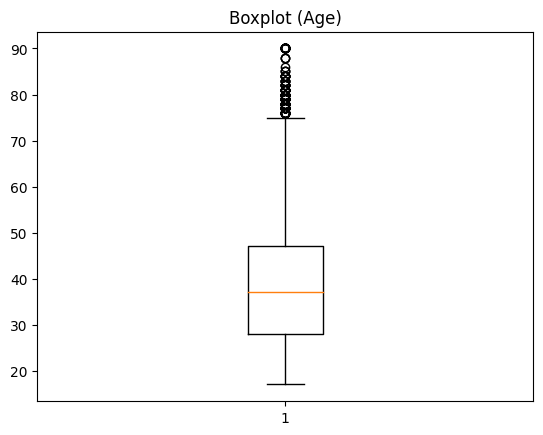

In [265]:
# Boxplot for outlier detection
plt.boxplot(train['Age']); plt.title("Boxplot (Age)")
plt.show()

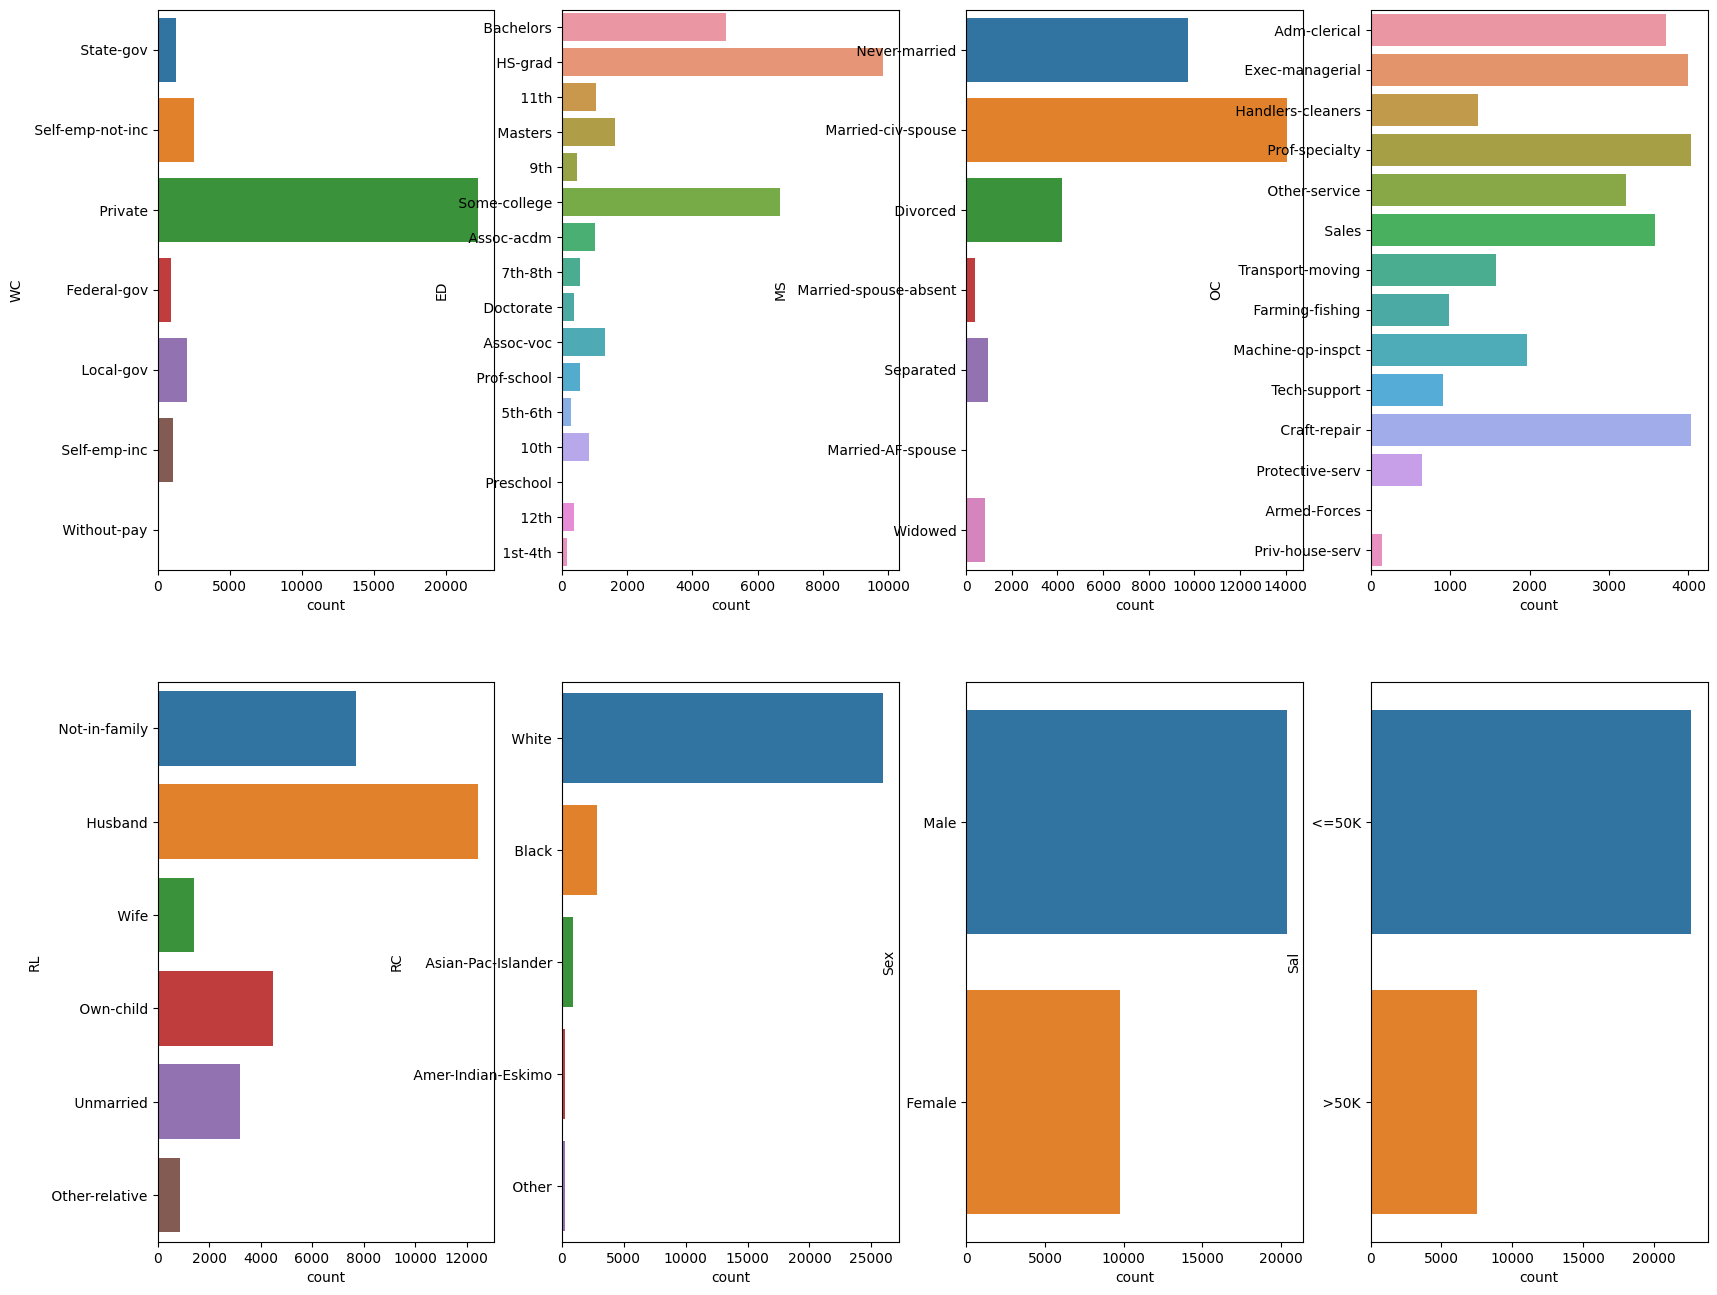

In [266]:
# Ploting Countolot for Categorical data

plt.subplots(figsize=(20,16))
[plt.subplot(2,4,1), sns.countplot(data=train, y='WC')];

[plt.subplot(2,4,2), sns.countplot(data=train, y='ED')];

[plt.subplot(2,4,3), sns.countplot(data=train, y='MS')];

[plt.subplot(2,4,4), sns.countplot(data=train, y='OC')];

[plt.subplot(2,4,5), sns.countplot(data=train, y='RL')];

[plt.subplot(2,4,6), sns.countplot(data=train, y='RC')];

[plt.subplot(2,4,7), sns.countplot(data=train, y='Sex')];

[plt.subplot(2,4,8), sns.countplot(data=train, y='Sal')];

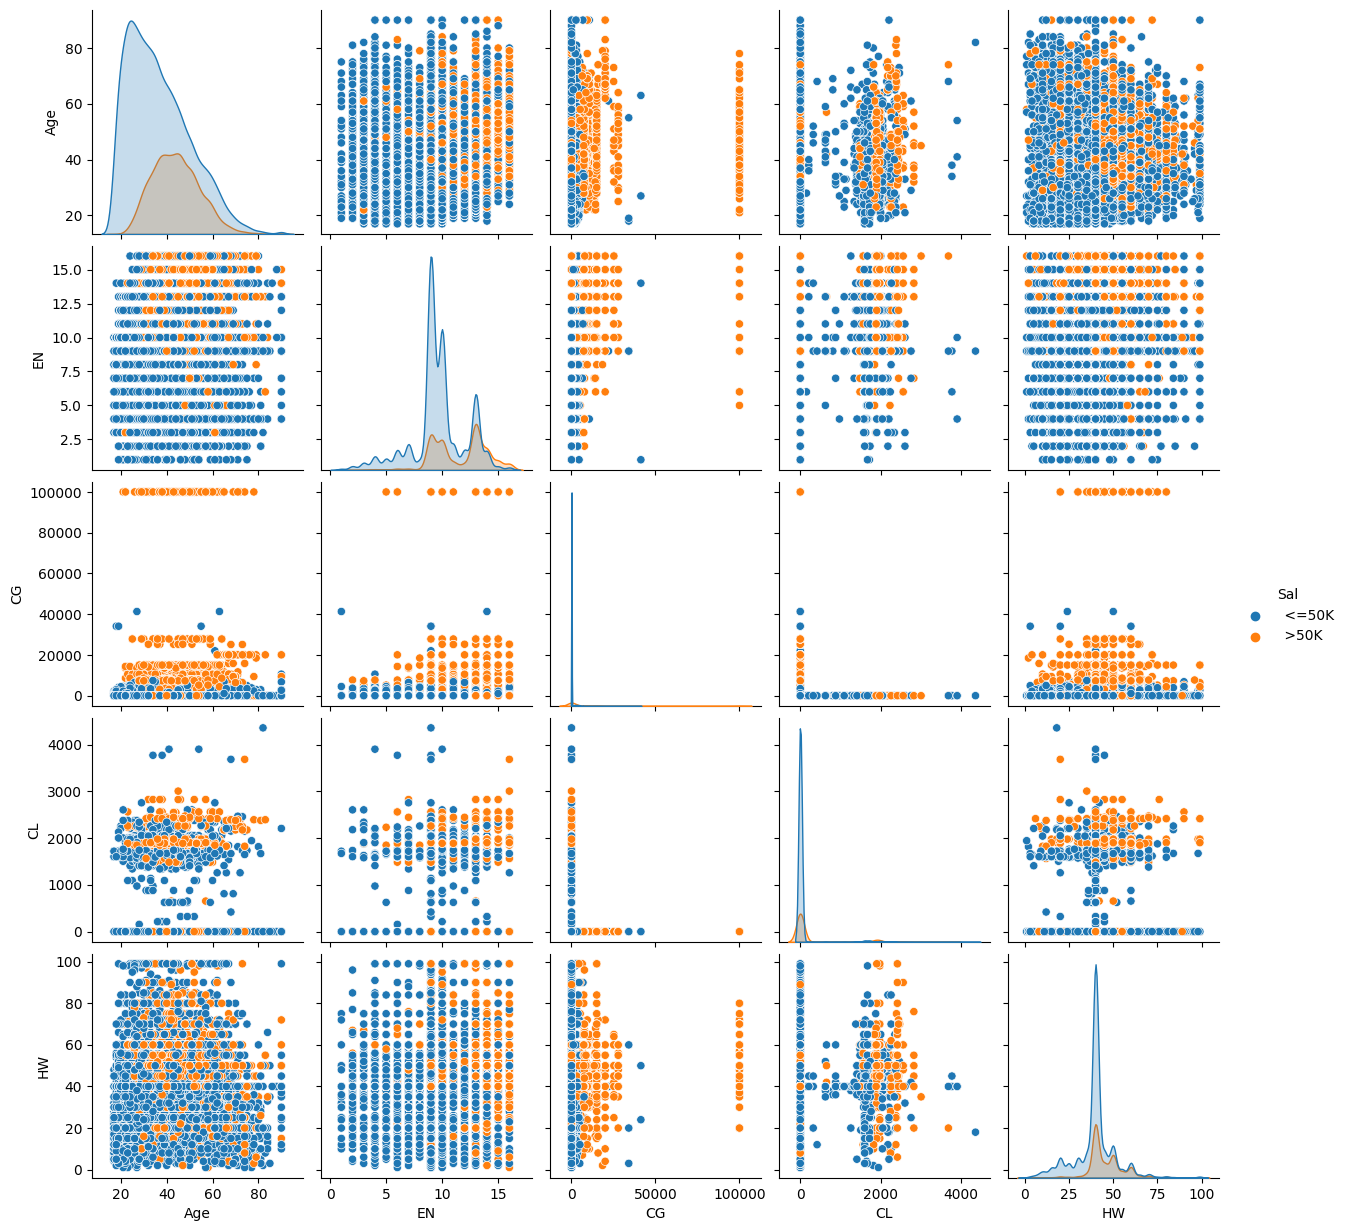

In [267]:
# Plotting pairplot for visualize all the attributes in one plot
sns.pairplot(train, hue = 'Sal')
plt.show()

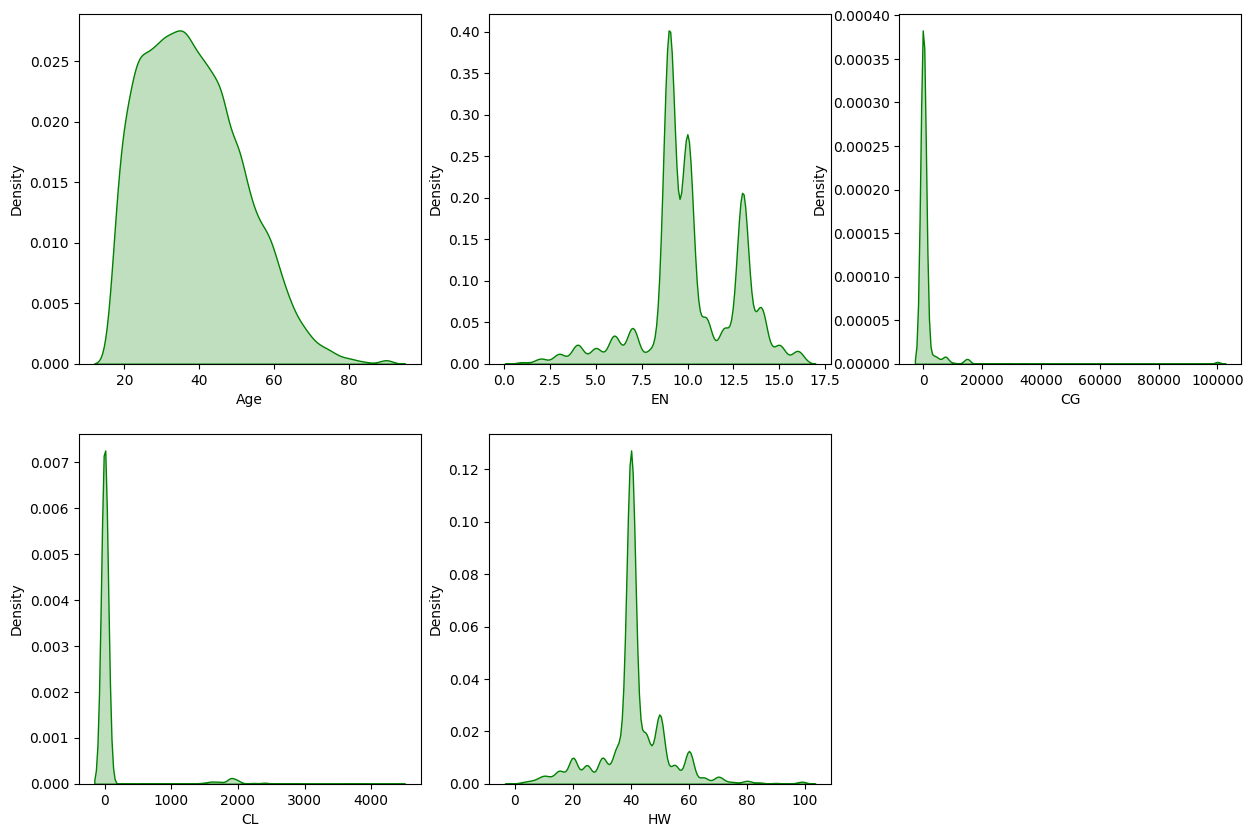

In [269]:
# Kde Plot for numerical columns/ data
no_columns = train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(15,10))
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(train[column],color='g',shade=True)

# Naive Bayes

In [270]:
# Convert salary column string  to integer
# Converting categorical data into Numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# train['Sal'] = LE.fit_transform(train['Sal'])

In [271]:
train.columns

Index(['Age', 'WC', 'ED', 'EN', 'MS', 'OC', 'RL', 'RC', 'Sex', 'CG', 'CL',
       'HW', 'Nat', 'Sal'],
      dtype='object')

In [272]:
col = ['Age','WC', 'ED', 'MS', 'OC', 'RL', 'RC', 'Sex', 'Nat', 'Sal']
for i in col:
    df[i] = LE.fit_transform(df[i])
df

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,33,4,9,13,2,3,0,4,1,0,0,13,37,0
2,21,2,11,9,0,5,1,4,1,0,0,40,37,0
3,36,2,1,7,2,5,0,2,1,0,0,40,37,0
4,11,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,0


# ---------------------------------------------------------------------------------------------------------------

# Importing test dataaset

In [273]:
test = pd.read_csv("D:\Data Science\Assignments\SalaryData_Test.csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [274]:
test.shape

(15060, 14)

In [275]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [276]:
test.columns = ['Age', 'WC', 'ED', 'EN', 'MS',
       'OC', 'RL', 'RC', 'Sex', 'CG',
       'CL', 'HW', 'Nat', 'Sal']

In [277]:
test.columns

Index(['Age', 'WC', 'ED', 'EN', 'MS', 'OC', 'RL', 'RC', 'Sex', 'CG', 'CL',
       'HW', 'Nat', 'Sal'],
      dtype='object')

In [278]:
test.index

RangeIndex(start=0, stop=15060, step=1)

In [279]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     15060 non-null  int64 
 1   WC      15060 non-null  object
 2   ED      15060 non-null  object
 3   EN      15060 non-null  int64 
 4   MS      15060 non-null  object
 5   OC      15060 non-null  object
 6   RL      15060 non-null  object
 7   RC      15060 non-null  object
 8   Sex     15060 non-null  object
 9   CG      15060 non-null  int64 
 10  CL      15060 non-null  int64 
 11  HW      15060 non-null  int64 
 12  Nat     15060 non-null  object
 13  Sal     15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [280]:
test.describe()

,Age,EN,CG,CL,HW
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [281]:
test.isna().sum()

Age    0
WC     0
ED     0
EN     0
MS     0
OC     0
RL     0
RC     0
Sex    0
CG     0
CL     0
HW     0
Nat    0
Sal    0
dtype: int64

In [282]:
test[test.duplicated()]

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [283]:
# Correlation
# Checking Correlation between numerical function
corr = test.corr()  ## correlation without droping duplicated raws
corr

,Age,EN,CG,CL,HW
Age,1.000000,0.026123,0.078760,0.057745,0.102758
EN,0.026123,1.000000,0.131750,0.085817,0.133691
CG,0.078760,0.131750,1.000000,-0.031876,0.090501
CL,0.057745,0.085817,-0.031876,1.000000,0.057712
HW,0.102758,0.133691,0.090501,0.057712,1.000000


<AxesSubplot: >

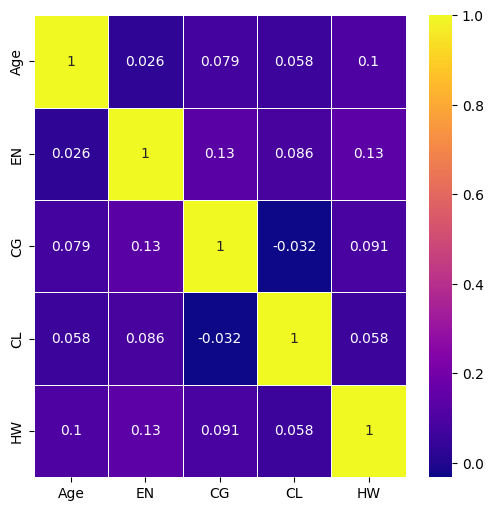

In [284]:
# creating heatmap by use of correlation
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot = True,  linewidths = 0.5, cmap = 'plasma' )

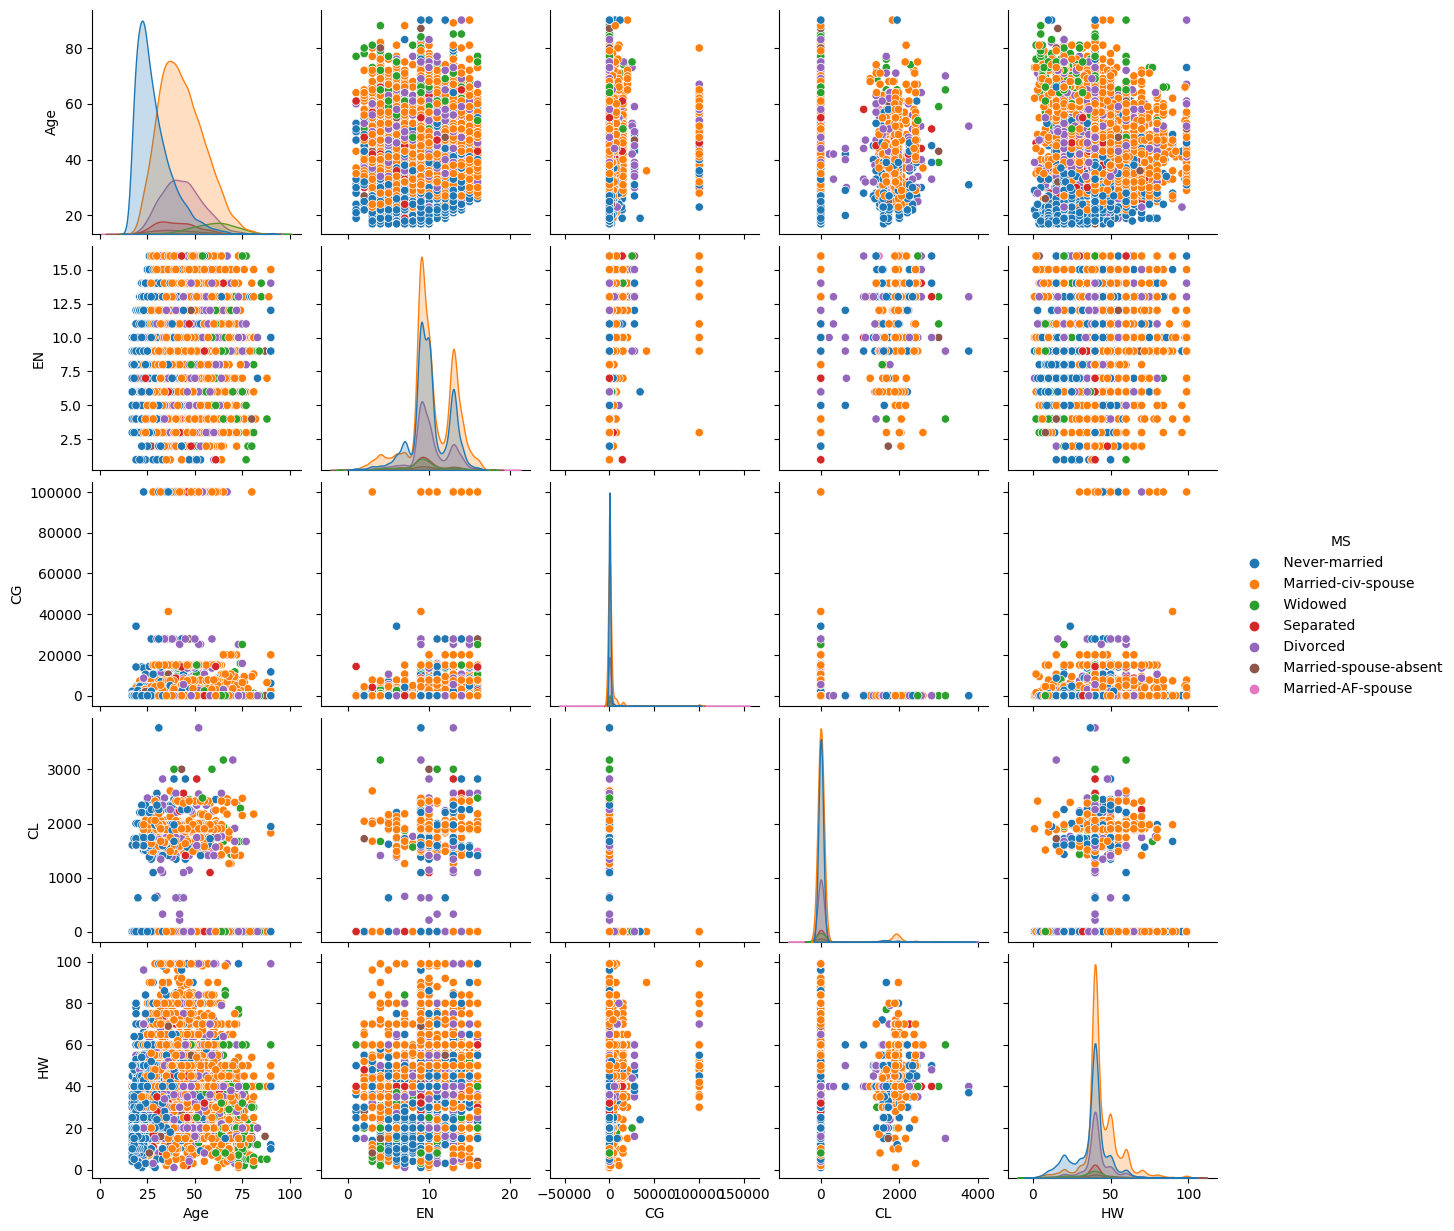

In [310]:
sns.pairplot(test, hue = 'MS')
plt.show()

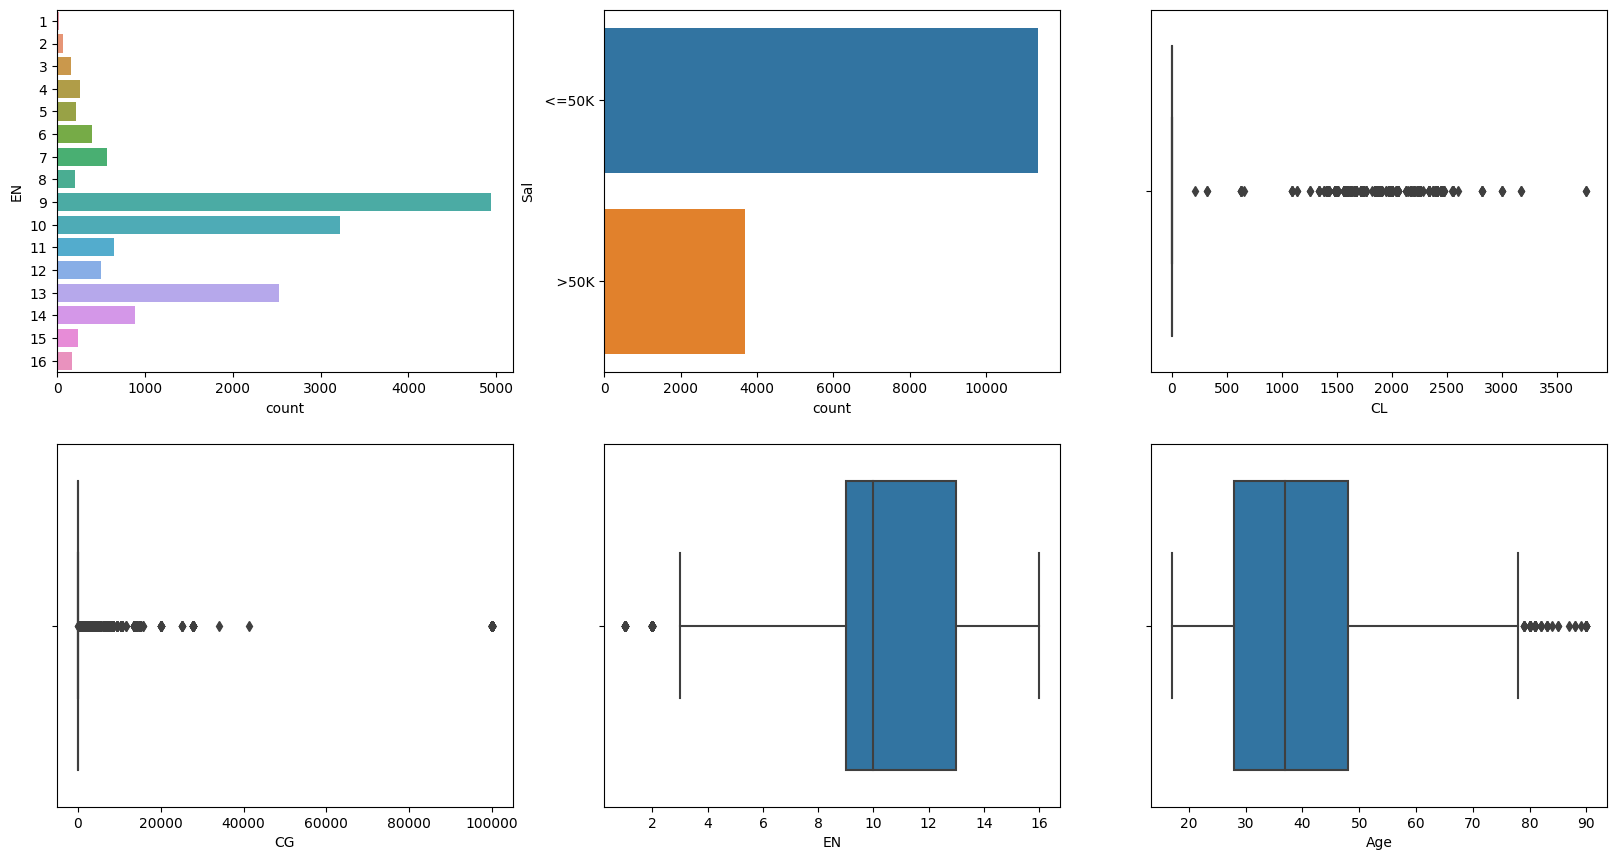

In [311]:
plt.subplots(figsize=(20,16))
[plt.subplot(3,3,1), sns.countplot(data=test, y='EN')];

[plt.subplot(3,3,2), sns.countplot(data=test, y='Sal')];

[plt.subplot(3,3,3), sns.boxplot(x=test["CL"])];  #Ploting Boplot for numerical data

[plt.subplot(3,3,4), sns.boxplot(x=test["CG"])];

[plt.subplot(3,3,5), sns.boxplot(x=test["EN"])];

[plt.subplot(3,3,6), sns.boxplot(x=test["Age"])];

In [285]:
df2 = test.drop_duplicates()
df2

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [286]:
col = ['Age', 'WC','ED', 'MS', 'OC', 'RL', 'RC', 'Sex', 'Nat', 'Sal']
for i in col:
    df2[i] = LE.fit_transform(df2[i])
df2

,Age,WC,ED,EN,MS,OC,RL,RC,Sex,CG,CL,HW,Nat,Sal
0,8,2,1,7,4,6,3,2,1,0,0,40,37,0
1,21,2,11,9,2,4,0,4,1,0,0,50,37,0
2,11,1,7,12,2,10,0,4,1,0,0,40,37,1
3,27,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,17,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,22,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,21,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,27,2,9,13,0,0,3,1,1,5455,0,40,37,0


# Appliying Naive Bayes

In [287]:
x_train = df.iloc[:,:13]
y_train = df.iloc[:,13]
x_test = df2.iloc[:,:13]
y_test = df2.iloc[:,13]

# 1. Gaussian NB

In [288]:
from sklearn.naive_bayes import GaussianNB
clsfrgnb = GaussianNB()   # clsfrgnb = claasification with Gussian Naive Bayes

In [289]:
# Model Making
model1 = clsfrgnb.fit(x_train, y_train)

In [290]:
# Prediction with x_test
y_pred_gnb = model1.predict(x_test)  # gnb=gausian naive bayes

In [291]:
y_pred_gnb

array([0, 0, 0, ..., 0, 1, 0])

In [292]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gnb)

array([[10056,   564],
       [ 2330,  1180]], dtype=int64)

In [293]:
((10056+1180)/(10056+564+2330+1180))*100

79.51875442321303

In [294]:
pd.crosstab(y_test.values.flatten(), clsfrgnb)

col_0,GaussianNB()
row_0,
0,10620
1,3510


In [295]:
print("Accuracy is : ", np.mean(y_pred_gnb == y_test.values.flatten())*100)

Accuracy is :  79.51875442321303


# 2. MultinomialNB

In [296]:
from sklearn.naive_bayes import MultinomialNB
clsfrmnb = MultinomialNB()    # clsfrgnb = claasification with Multinominal Naive Bayes

In [297]:
model2 = clsfrmnb.fit(x_train, y_train)

#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [298]:
y_pred_mnb = model2.predict(x_test)   # mnb=Multinominal naive bayes

In [299]:
# Confusion matrix
confusion_matrix(y_test, y_pred_mnb)

array([[10151,   469],
       [ 2733,   777]], dtype=int64)

In [300]:
((10151+777)/(10151+469+2733+777))*100

77.33899504600141

In [301]:
pd.crosstab(y_test.values.flatten(), clsfrmnb)

col_0,MultinomialNB()
row_0,
0,10620
1,3510


In [302]:
print("Accuracy is : ", np.mean(y_pred_mnb == y_test.values.flatten()))

Accuracy is :  0.7733899504600141


In [303]:
from sklearn.metrics import accuracy_score

In [304]:
accuracy_score(y_test, y_pred_mnb)

0.7733899504600141

# 3. Cross Validation Check

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression

In [306]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MNB', MultinomialNB()))

In [307]:
results = []
names = []
scoring = 'accuracy'

In [308]:
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.798684 (0.007299)
KNN: 0.824963 (0.010701)
CART: 0.788574 (0.005875)
NB: 0.793703 (0.010001)
MNB: 0.768316 (0.008122)


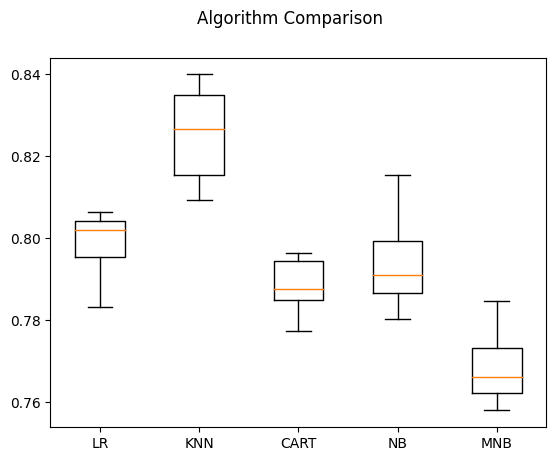

In [309]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Here I compare model with different algorithms for checking which algorith gives us higher accuracy

After comparing "KNN" gives higher accuracy 
Accuracy of KNN = 0.824777